In [14]:
import pandas as pd

train = pd.read_csv('train.csv', parse_dates = ["datetime"])
test = pd.read_csv('test.csv', parse_dates = ["datetime"])

In [15]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
from scipy import stats

import datetime
def concatenate_year_month_day(datetime):
    return "%s%s%s" % (datetime.year, datetime.month, datetime.day)
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)
train["YMD"] = train["datetime"].apply(concatenate_year_month_day)
train["YM"] = train["datetime"].apply(concatenate_year_month)
train_month = pd.pivot_table(train, index = "YM", values = 'count', aggfunc = np.sum)
train_day = pd.pivot_table(train, index = "YMD", values = 'count', aggfunc = np.sum)

In [28]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

<AxesSubplot:xlabel='workingday', ylabel='count'>

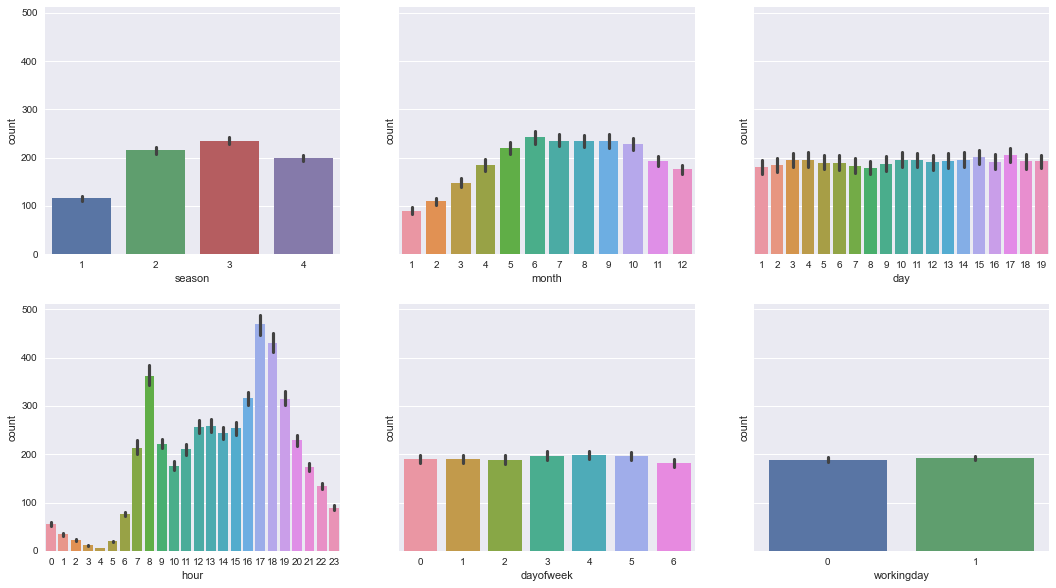

In [29]:
figure, axes = plt.subplots(nrows=2,ncols=3,sharey=True)
figure.set_size_inches(18,10)

sns.barplot(data=train,x="season", y="count",ax=axes[0][0])
sns.barplot(data=train,x="month", y="count",ax=axes[0][1])
sns.barplot(data=train,x="day", y="count",ax=axes[0][2])
sns.barplot(data=train,x="hour", y="count",ax=axes[1][0])
sns.barplot(data=train, x="dayofweek", y= "count", ax=axes[1][1])
sns.barplot(data=train, x="workingday", y= "count", ax=axes[1][2])